In [4]:
import matplotlib.pyplot as plt
from typing import Dict,List
INTERVAL = 100

#1.确定了每个对象只有一个id

class DataObject():
    def __init__(self, tag, objId, size, time):
        self.tag = tag
        self.objId = objId
        self.size = size
        self.createTime = time
        self.requestTmList = []
        self.requestIdList = []
    def request(self, id, time):
        self.requestTmList.append(time)
        self.requestIdList.append(id)
    def delete(self, time):
        self.deleteTime = time
    def getLifeSpan(self):
        return self.deleteTime - self.createTime + 1

class DataSet():
    def __init__(self, dataFile):
        self.dataFile = dataFile
        self.objDict:Dict[int, List[DataObject]] = {}#objid:[obj,],这是为了防止有
        self.getConstant()
        self.countData()
    def getConstant(self):
        with open(self.dataFile, 'r', encoding='utf-8') as file:
            line = file.readline()
            user_input = line.split()
            self.TOLTIME = int(user_input[0])+105
            self.TAGNUM = int(user_input[1])
            self.DISKNUM = int(user_input[2])
            self.UNITNUM = int(user_input[3])
            self.TOKENNUM = int(user_input[4])
    def countData(self):
        with open(self.dataFile, 'r', encoding='utf-8') as file:
            lines = file.readlines()
            lineNum = 0
            while(not lines[lineNum].startswith("TIMESTAMP")):
                lineNum+=1
            time = 0
            while(lineNum<len(lines)):
                line = lines[lineNum]
                if(line.startswith("TIMESTAMP")):
                    sline = line.split(' ')
                    assert(len(sline)==2)
                    time = int(sline[1])
                    lineNum += 1
                    continue
                delNum = int(lines[lineNum])
                lineNum += 1
                for i in range(delNum):
                    sline = lines[lineNum]
                    objList = self.objDict.get(int(sline))
                    assert(objList)
                    objList[-1].delete(time)
                    lineNum += 1
                wrtNum = int(lines[lineNum])
                lineNum += 1
                for i in range(wrtNum):
                    sline = lines[lineNum].split()
                    dobj = DataObject(int(sline[2]), int(sline[0]), int(sline[1]), time)
                    if(self.objDict.get(int(sline[0]))):
                        self.objDict.get(int(sline[0])).append(dobj)
                    else:
                        self.objDict[int(sline[0])] = [dobj]
                    lineNum += 1
                reqNum = int(lines[lineNum])
                lineNum += 1
                for i in range(reqNum):
                    sline = lines[lineNum].split()
                    objList = self.objDict.get(int(sline[1]))
                    assert(objList)
                    objList[-1].request(sline[0], time)
                    lineNum += 1
    def tagBucketNum(self, interval, tag, type):
        bucketNum = [0 for _ in range(int((self.TOLTIME-1)/interval)+1)]
        for key, objList in self.objDict.items():
            for obj in objList:
                if(obj.tag != tag):
                    continue
                if(type == 'create'):
                    bucketNum[int((obj.createTime-1)/interval)] += 1
                elif(type == 'request'):
                    for req in obj.requestTmList:
                        bucketNum[int((req-1)/interval)] += 1
        return bucketNum
    def bucketNum(self, interval, type):
        bucketNum = [0 for _ in range(int((self.TOLTIME-1)/interval)+1)]
        for key, objList in self.objDict.items():
            for obj in objList:
                if(type == 'create'):
                    bucketNum[int((obj.createTime-1)/interval)] += 1
                elif(type == 'request'):
                    for req in obj.requestTmList:
                        bucketNum[int((req-1)/interval)] += 1
        return bucketNum
    def getNumDivideByTag(self):
        bucketNum = [0 for _ in range(self.TAGNUM)]
        for key, objList in self.objDict.items():
            for obj in objList:
                bucketNum[obj.tag-1] += 1
        return bucketNum



In [5]:
# 初始化ds，处理数据
ds = DataSet("sample_practice.in")

Text(0, 0.5, 'create')

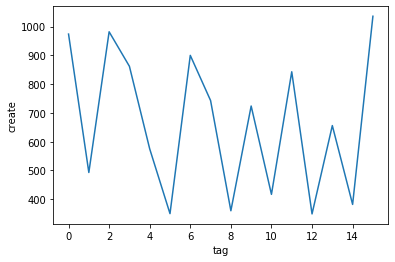

In [ ]:
# 验证每个对象id只对应一个对象（即对象id不会轮转复用）
maxLen = 1
for key,objList in ds.objDict.items():
    assert(maxLen == len(objList))
    
# 绘制每个tag的总存储对象数量
taglist = [i for i in range(ds.TAGNUM)]
data = ds.getNumDivideByTag()
plt.plot(taglist, data)
plt.xlabel("tag")
plt.ylabel("create")

433 : 433


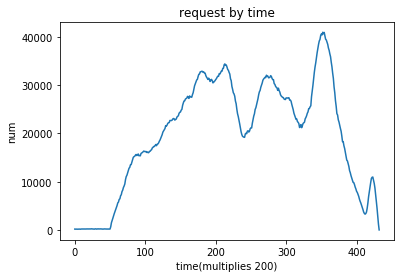

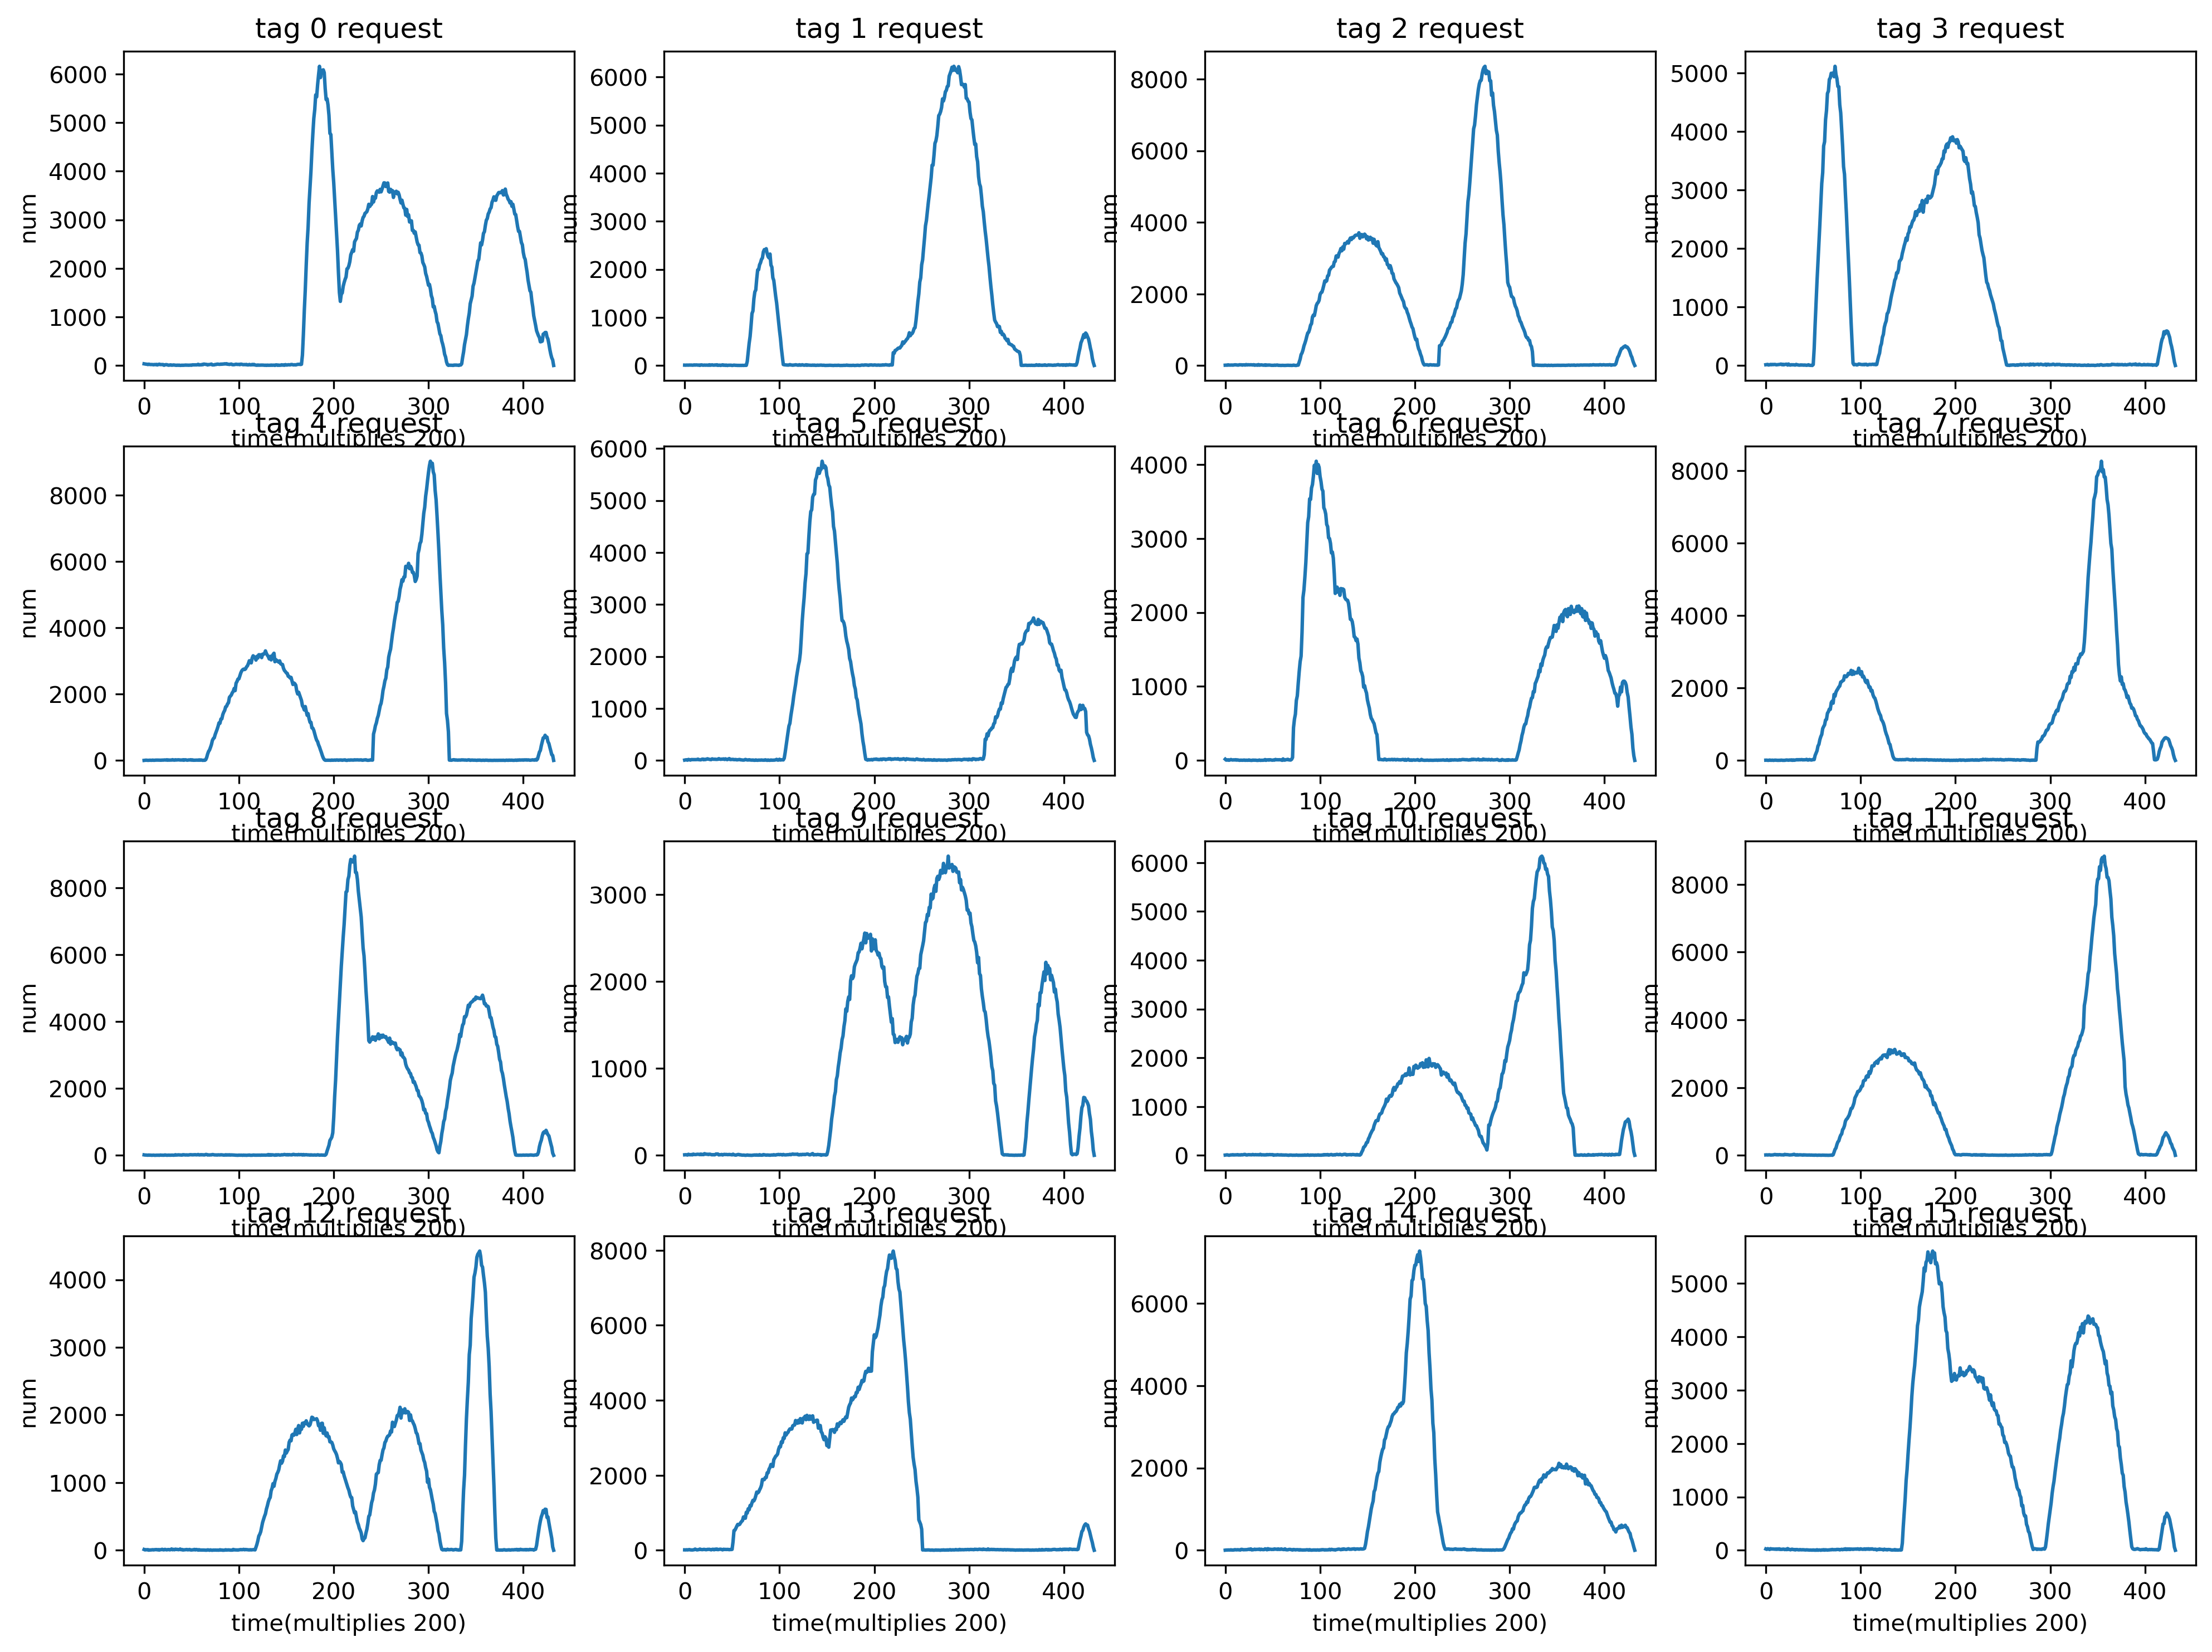

In [7]:
# 绘制每interval个时间步内的请求数量
interval = 200
btype = 'request'
dim = int((ds.TOLTIME-1)/interval)+1
data = ds.bucketNum(interval, btype)
timelist = [i for i in range(dim)]
print(dim, ':' ,len(data))
assert(dim == len(data))
plt.plot(timelist, data)
# 添加标题和标签
plt.title('request by time')
plt.xlabel('time(multiplies {})'.format(interval))
plt.ylabel('num')
plt.show()

# 分别绘制每个tag的 每interval个时间步内的请求数量
plt.figure(figsize=(16, 12), dpi=300)
for i in range(ds.TAGNUM):
    plt.subplot(4, 4, i+1)
    data = ds.tagBucketNum(interval, i+1, btype)
    plt.plot(timelist, data)
    plt.title('tag {} request'.format(i))
    plt.xlabel('time(multiplies {})'.format(interval))
    plt.ylabel('num')
# 显示图形
plt.show()

174 : 174


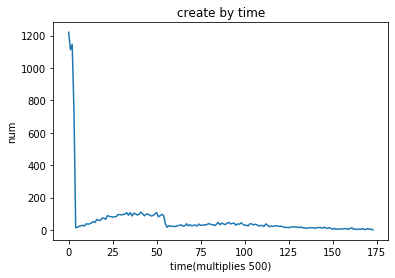

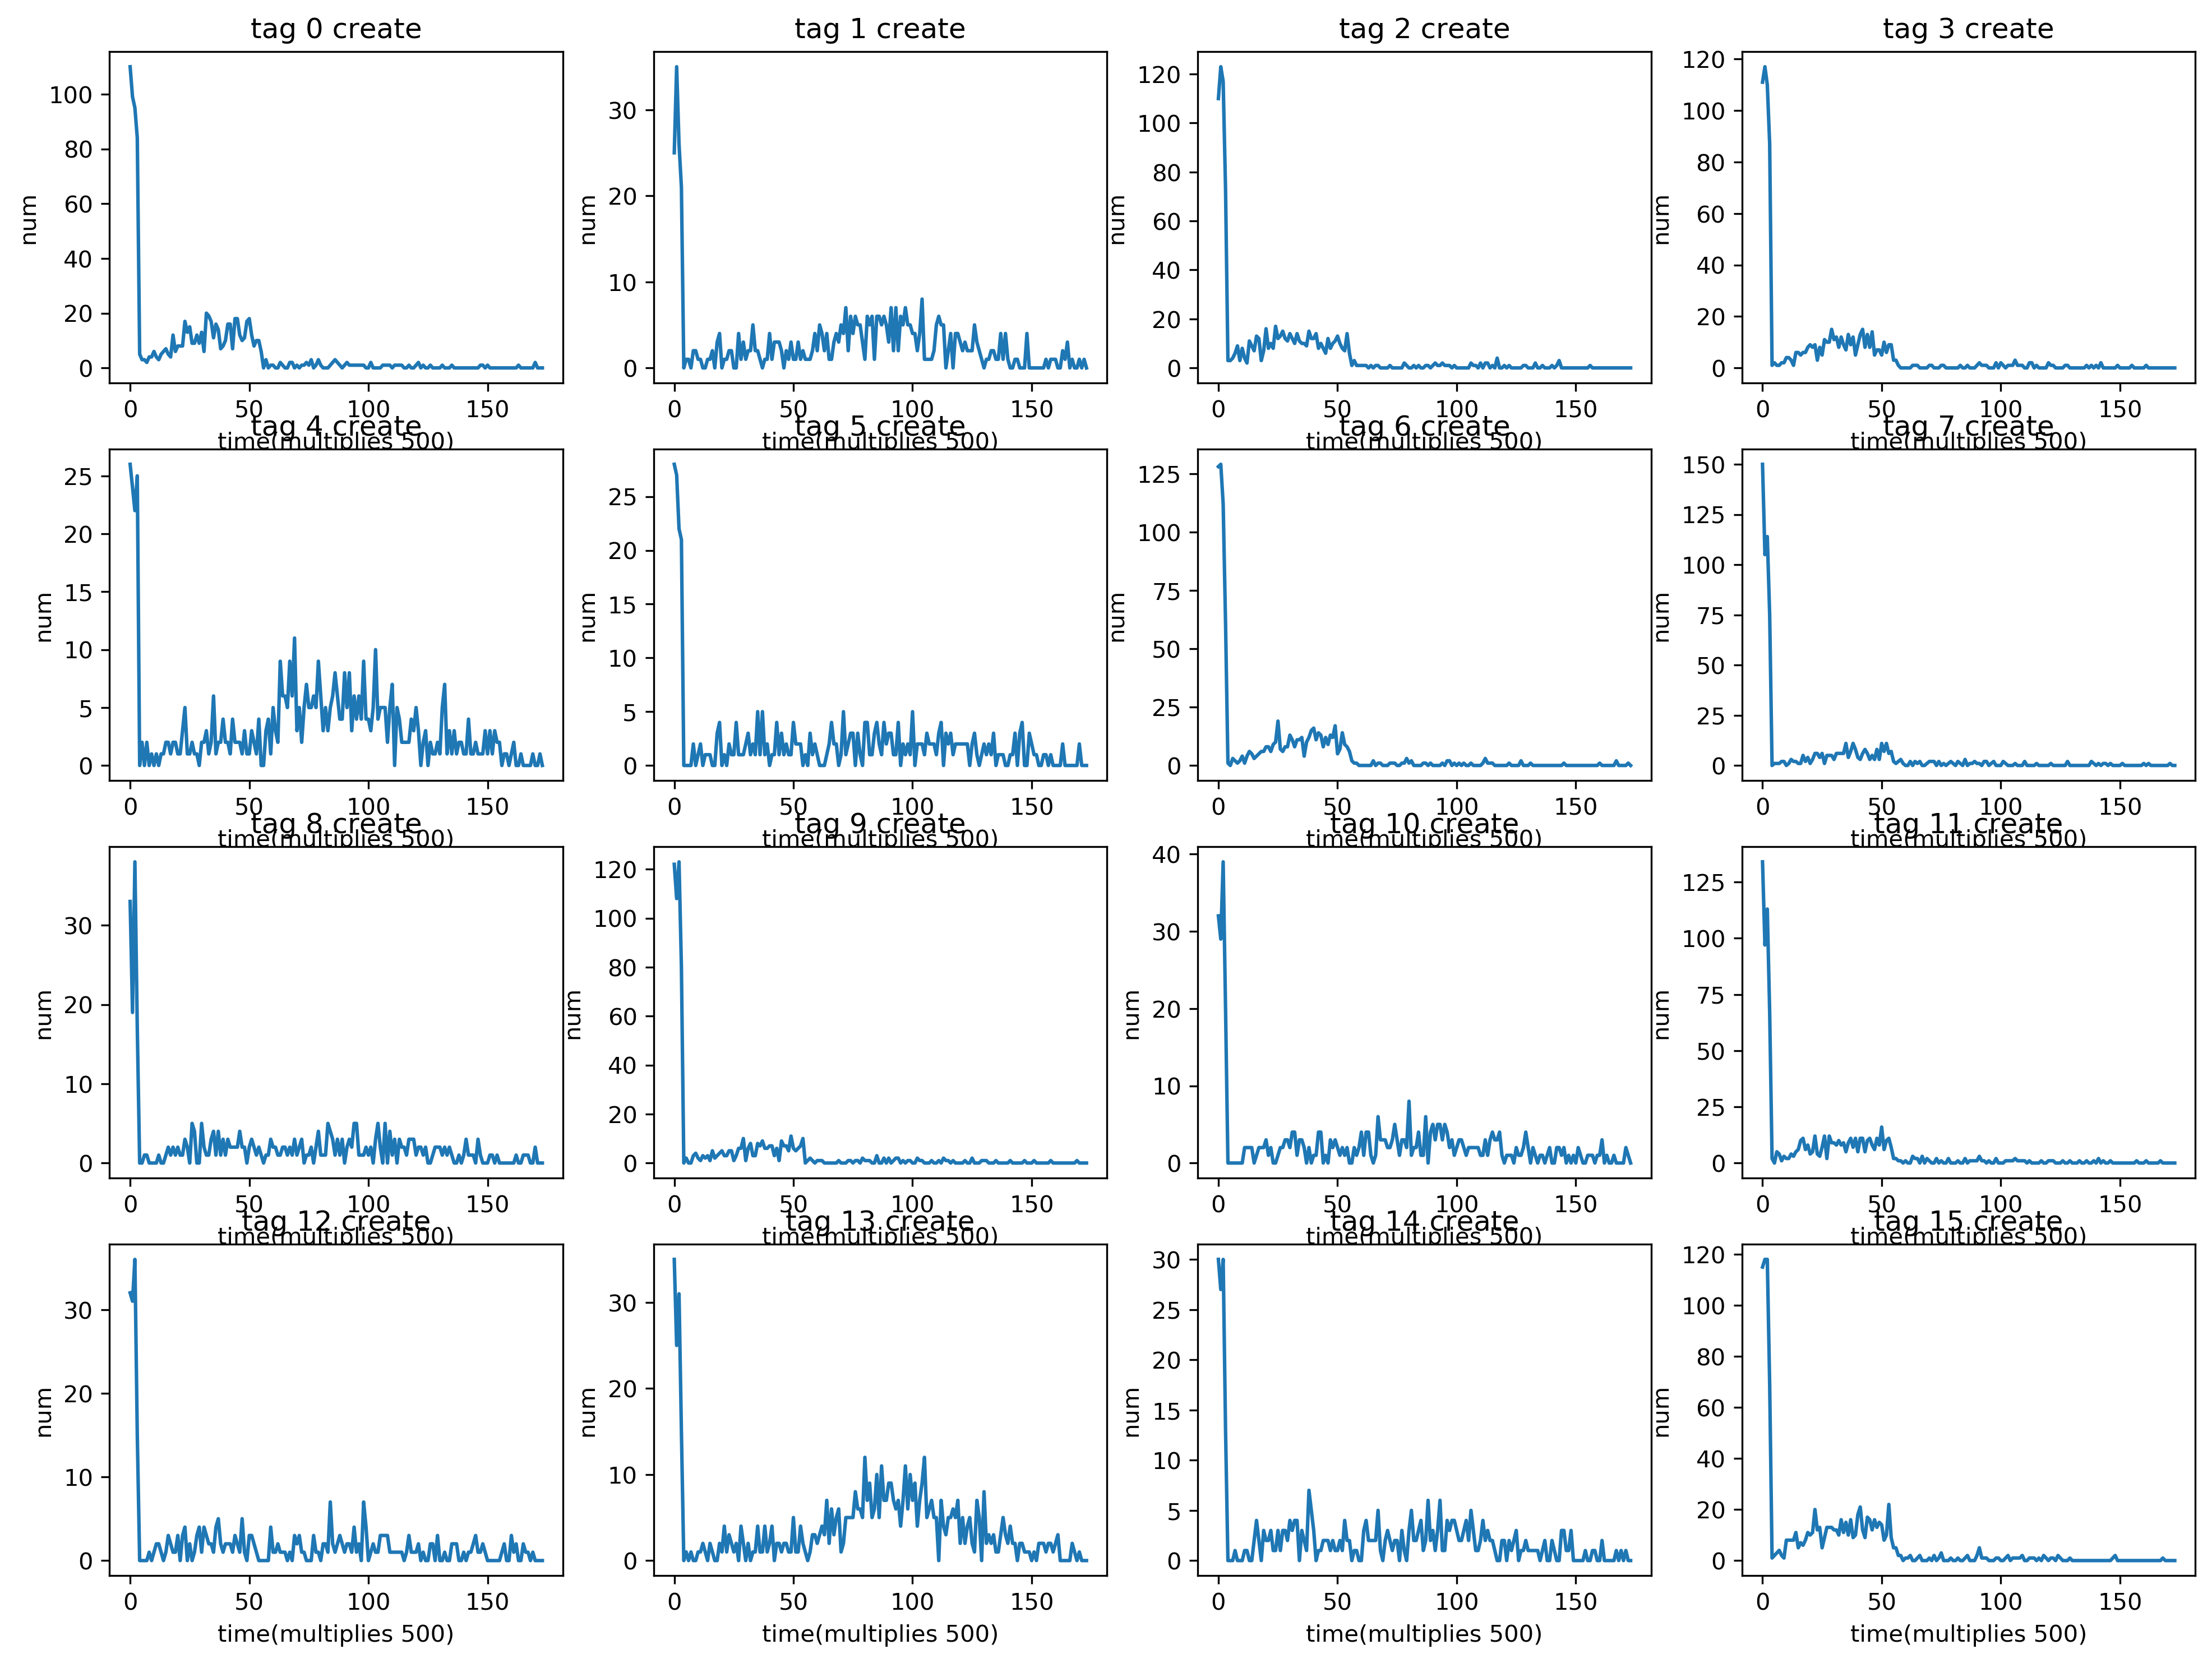

In [8]:
# 绘制每interval个时间步内的对象创建数量
interval = 500
btype = 'create'
dim = int((ds.TOLTIME-1)/interval)+1
data = ds.bucketNum(interval, btype)
tlist = [i for i in range(dim)]
print(dim, ':' ,len(data))
assert(dim == len(data))
plt.plot(tlist, data)
plt.title('{} by time'.format(btype))
plt.xlabel('time(multiplies {})'.format(interval))
plt.ylabel('num')
plt.show()

# 分别绘制每个tag的 每interval个时间步内的对象创建数量
plt.figure(figsize=(16, 12), dpi=300)
for i in range(ds.TAGNUM):
    plt.subplot(4, 4, i+1)
    data = ds.tagBucketNum(interval, i+1, btype)
    plt.plot(tlist, data)
    plt.title('tag {} {}'.format(i, btype))
    plt.xlabel('time(multiplies {})'.format(interval))
    plt.ylabel('num')
# 显示图形
plt.show()